In [27]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt

In [28]:
def joint_prob(u,v,r,m, px,py,pz):
    #u: X error, v Zerror, r syndrome with weight r, m number of repetitions
    first_term = (px+py)**(u*(m-2*r)+r)*(1-px-py)**((1-u)*(m-2*r)+r)
    second_term = (px-py)**(u*(m-2*r)+r)*(1-px-py-2*pz)**((1-u)*(m-2*r)+r)
    return 0.5*(first_term+(-1)**v*second_term)

In [29]:
def probability_of_a_syndrome(r,m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    return joint_prob(0,0,r,m, px,py,pz)+joint_prob(0,1,r,m, px,py,pz)+joint_prob(1,0,r,m, px,py,pz)+joint_prob(1,1,r,m, px,py,pz)

In [30]:
def new_channel(r,m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    prob_syndrome = probability_of_a_syndrome(r,m,px,py,pz)
    pI = joint_prob(0,0,r,m, px,py,pz)/prob_syndrome
    pZ = joint_prob(0,1,r,m, px,py,pz)/prob_syndrome
    pX = joint_prob(1,0,r,m, px,py,pz)/prob_syndrome
    pY = joint_prob(1,1,r,m, px,py,pz)/prob_syndrome
    return pI,pX,pY,pZ

In [31]:
def rate(p):
    pI = p[0]
    pX = p[1]
    pY = p[2]
    pZ = p[3]
    return 1+pI*np.log2(pI)+pX*np.log2(pX)+pY*np.log2(pY)+pZ*np.log2(pZ)

In [32]:
def concatenated_channel_rate(m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    concatenated_rate = 0
    for r in range(0,m):
        concatenated_rate += binom(m-1,r)*probability_of_a_syndrome(r,m,px,py,pz)*rate(new_channel(r,m,px,py,pz))
    return concatenated_rate/m

In [33]:


def get_best_rate(pX,pY,pZ):
    pvec = [1-pX-pY-pZ,pX,pY,pZ]
    best_rate = rate(pvec)
    best_number_of_repetitions = 1
    for repetitions in range(2,37):
        r = concatenated_channel_rate(repetitions,pX,pY,pZ)
        if r>=best_rate:
            best_rate = r
            best_number_of_repetitions = repetitions
    print(best_rate,best_number_of_repetitions)
    return best_rate


probz 0.25 0.23
-2.419778503393722e-07 36
probz 0.25 0.231
-2.419778503393722e-07 36
probz 0.25 0.232
-2.419778503393722e-07 36
probz 0.25 0.233
-2.419778503393722e-07 36
probz 0.25 0.234
-2.419778503393722e-07 36
probz 0.25 0.23500000000000001
-2.419778503393722e-07 36
probz 0.25 0.23600000000000002
-2.419778503393722e-07 36
probz 0.25 0.23700000000000002
-2.419778503393722e-07 36
probz 0.25 0.23800000000000002
-2.419778503393722e-07 36
probz 0.25 0.23900000000000002
-2.419778503393722e-07 36
probz 0.25 0.24000000000000002
-2.419778503393722e-07 36
probz 0.25 0.24100000000000002
-2.419778503393722e-07 36
probz 0.25 0.24200000000000002
-2.419778503393722e-07 36
probz 0.25 0.24300000000000002
-2.419778503393722e-07 36
probz 0.25 0.24400000000000002
-2.419778503393722e-07 36
probz 0.25 0.24500000000000002
-2.419778503393722e-07 36
probz 0.25 0.24600000000000002
-2.419778503393722e-07 36
probz 0.25 0.24700000000000003
-2.419778503393722e-07 36
probz 0.25 0.24800000000000003
-2.41977850339

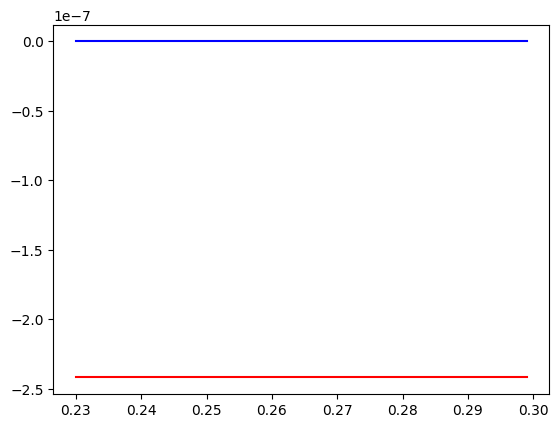

In [38]:
concatenated_best_rate = []
hashing_rate = []
prange =np.arange(0.23,0.3,0.001)
for p_total in prange:
    if (10-np.sqrt(100-36*p_total) >=0) and (10-np.sqrt(100-36*p_total)<=1):
        q = (10-np.sqrt(100-36*p_total))/18
    else:
        q = (10+np.sqrt(100-36*p_total))/18
    qx = 9*q
    qz = q
    pX = qx*(1-qz)
    pZ = qz*(1-qx)
    pY = qx*qz
    pX = 0.25/3
    pY=0.25/3
    pZ=0.25/3
    print('probz', pX+pY+pZ, p_total)
    pvec = [1-pX-pY-pZ,pX,pY,pZ]
    hashing_rate.append(max(rate(pvec),0))
    concatenated_best_rate.append(get_best_rate(pX,pY,pZ))
plt.plot(prange,concatenated_best_rate,'r')
plt.plot(prange,hashing_rate,'b')